<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%206/Week_6_clusteringweek06_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive

file_path = "/content/drive/MyDrive/Dataset/clusteringweek06.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


In [4]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk machine learning: scaling dan clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Untuk metrik evaluasi clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Memberi style pada plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
print("Library berhasil di-import.")

Library berhasil di-import.


# EDA & Preprocessing

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

In [6]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']

--- Kolom Categorikal ---
[]

--- Kolom Numerikal ---
['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']


In [7]:
print("Lima baris pertama dari data:")
print(df.head())

Lima baris pertama dari data:
    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        

In [8]:
# Mengecek jumlah nilai yang hilang (missing values) di setiap kolom
print("\n--- Jumlah Nilai yang Hilang per Kolom ---")
print(df.isnull().sum())


--- Jumlah Nilai yang Hilang per Kolom ---
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
dtype: int64


In [9]:
# 4. Scaling Fitur (Feature Scaling)
# Semua kolom yang tersisa sekarang adalah fitur untuk clustering
X = df

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data
X_scaled = scaler.fit_transform(X)

# Mengubah hasil scaling kembali ke DataFrame agar mudah dibaca
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Data Setelah Diproses dan Diskalakan (5 Baris Pertama) ---")
print(X_scaled_df.head())

print("\n\nLangkah 1 Selesai dengan Sukses! Data siap untuk clustering.")
print("Variabel 'X_scaled' berisi data akhir yang akan kita gunakan.")



--- Data Setelah Diproses dan Diskalakan (5 Baris Pertama) ---
         x1        x2        x3        x4        x5        x6        x7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.300622  1.415359  0.363097   
2  0.146578 -0.783334 -1.495953 -0.990973  0.915536  0.763498  0.058992   
3  0.146578 -0.453678 -0.729537 -0.727096  1.505993  2.184868  0.098592   
4  0.146578 -1.078343 -1.440441 -0.867225  1.252998  1.255819  0.048313   

         x8        x9       x10  ...       x13       x14       x15       x16  \
0 -1.287190 -1.672333  0.540390  ... -1.485897  0.796627  1.265956 -0.551081   
1 -1.909853 -1.876612  0.903961  ... -1.959178  0.406743  1.412903 -0.250524   
2 -2.079764 -1.940639  1.389091  ... -1.877203  0.590374  1.647536  0.345883   
3 -1.667990 -1.264799  1.686808  ... -2.262481  0.181478  1.077586 -0.769643   
4 -2.279164 -1.681117  1.655798  ... -2.172759  0.502823  1.710511  0.173262   

    

Memulai perhitungan untuk Elbow Method dan Silhouette Score...
Perhitungan selesai. Menampilkan grafik...


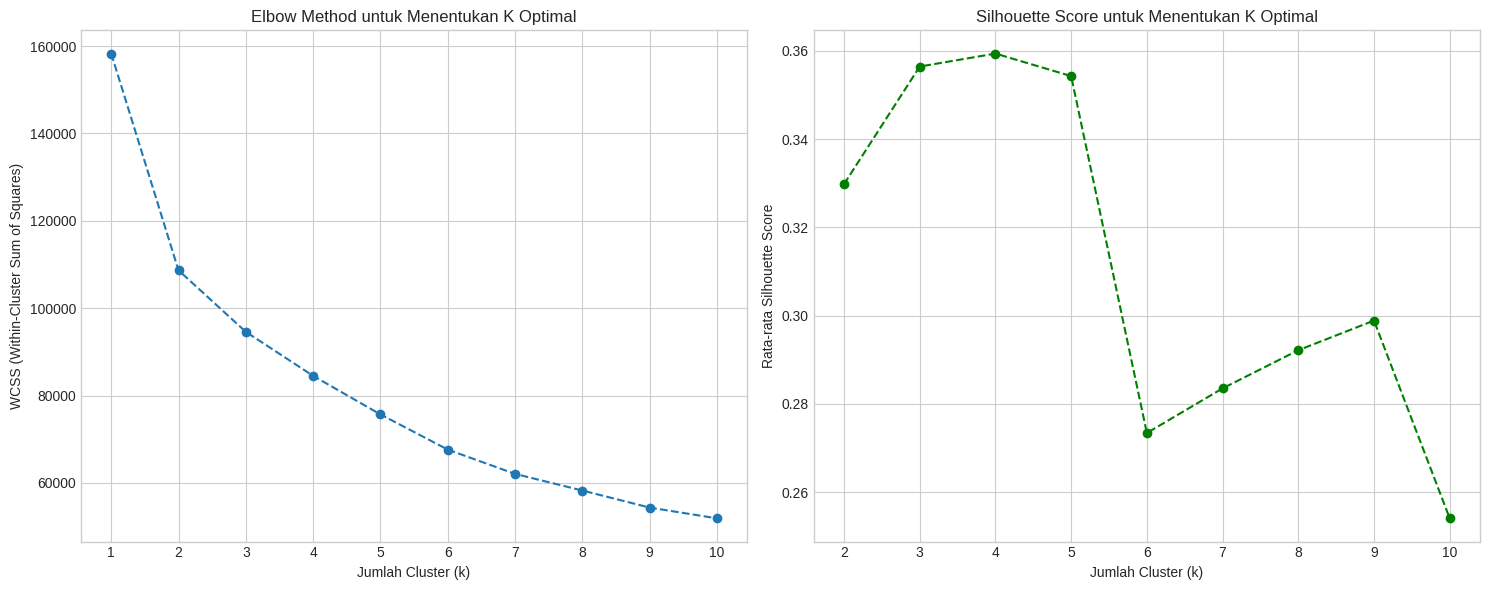

In [10]:
# Pastikan Anda telah menjalankan kode dari Langkah 1 sebelumnya
# sehingga variabel X_scaled sudah tersedia.

# Import library yang dibutuhkan untuk Langkah 2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan range jumlah cluster yang akan diuji
k_range = range(1, 11)
k_range_silhouette = range(2, 11) # Silhouette score tidak bisa dihitung untuk k=1

# List untuk menyimpan hasil perhitungan
wcss_list = []
silhouette_list = []

print("Memulai perhitungan untuk Elbow Method dan Silhouette Score...")

# --- Perhitungan untuk Elbow Method ---
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_list.append(kmeans.inertia_) # inertia_ adalah nilai WCSS

# --- Perhitungan untuk Silhouette Score ---
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_list.append(silhouette_avg)

print("Perhitungan selesai. Menampilkan grafik...")

# --- Membuat Grafik ---
# Membuat figure dengan 2 subplot (1 baris, 2 kolom)
plt.figure(figsize=(15, 6))

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_list, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range_silhouette, silhouette_list, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Rata-rata Silhouette Score')
plt.xticks(k_range_silhouette)

plt.tight_layout()
plt.show()



 **Analisis Grafik Anda & Langkah Selanjutnya**

Melihat grafik, kita bisa dengan yakin menyimpulkan:

  * Terjadi penurunan yang sangat tajam dari K=1 ke K=2, dan dari K=2 ke K=3.
  * Setelah K=3, penurunan nilai Inertia menjadi jauh lebih landai. Garisnya mulai "mendatar".
  * "Siku" atau **elbow** yang paling jelas dan ideal pada grafik Anda berada di **K=3**.

Jadi, selamat, Anda telah berhasil menemukan jumlah cluster yang paling optimal untuk model K-Means Anda, yaitu **3 cluster**.



# Modelling

## Kmeans

In [11]:
# Pastikan Anda telah menjalankan kode dari langkah-langkah sebelumnya.
# Variabel X_scaled dan df (DataFrame asli) harus sudah ada.

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menetapkan jumlah cluster optimal yang kita pilih
K_OPTIMAL = 3

# 1. Membuat dan melatih model K-Means
kmeans_model = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# 2. Mendapatkan label cluster untuk setiap titik data
cluster_labels = kmeans_model.labels_

# 3. Menambahkan label cluster ke DataFrame asli (bukan yang di-scaling)
# Ini SANGAT PENTING untuk interpretasi, karena kita ingin melihat nilai asli (misal: Rupiah, bukan nilai standar)
df_clustered = df.copy() # Gunakan df, bukan df_clean atau df_processed
df_clustered['Cluster'] = cluster_labels

print(f"Model K-Means dengan {K_OPTIMAL} cluster berhasil dibuat.")
print("\nBerikut adalah 5 baris pertama data dengan label clusternya:")
print(df_clustered.head())

# 4. Menganalisis hasil clustering
print("\n--- Jumlah Pelanggan per Cluster ---")
print(df_clustered['Cluster'].value_counts().sort_index())

Model K-Means dengan 3 cluster berhasil dibuat.

Berikut adalah 5 baris pertama data dengan label clusternya:
    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x14       x15       x16       x17       x18  \
0 -0.171128  0.124676  ...  0.082245  0.135752 -0.024017 -0.108351 -0.077623   
1 -0.207693  0.170883  ...  0.022786  0.163320  0.012022 -0.090974 -0.056510   
2 -0.219153  0.232538  ...  0.050791  0.207338  0.083536 -0.050691 -0.023590   
3 -0.098181  0.270375  ... -0.011567  0.100413 -0.050224 -0.136009 -0.177037   
4 -0.1727

## Agglomerative Hierarchical Clustering

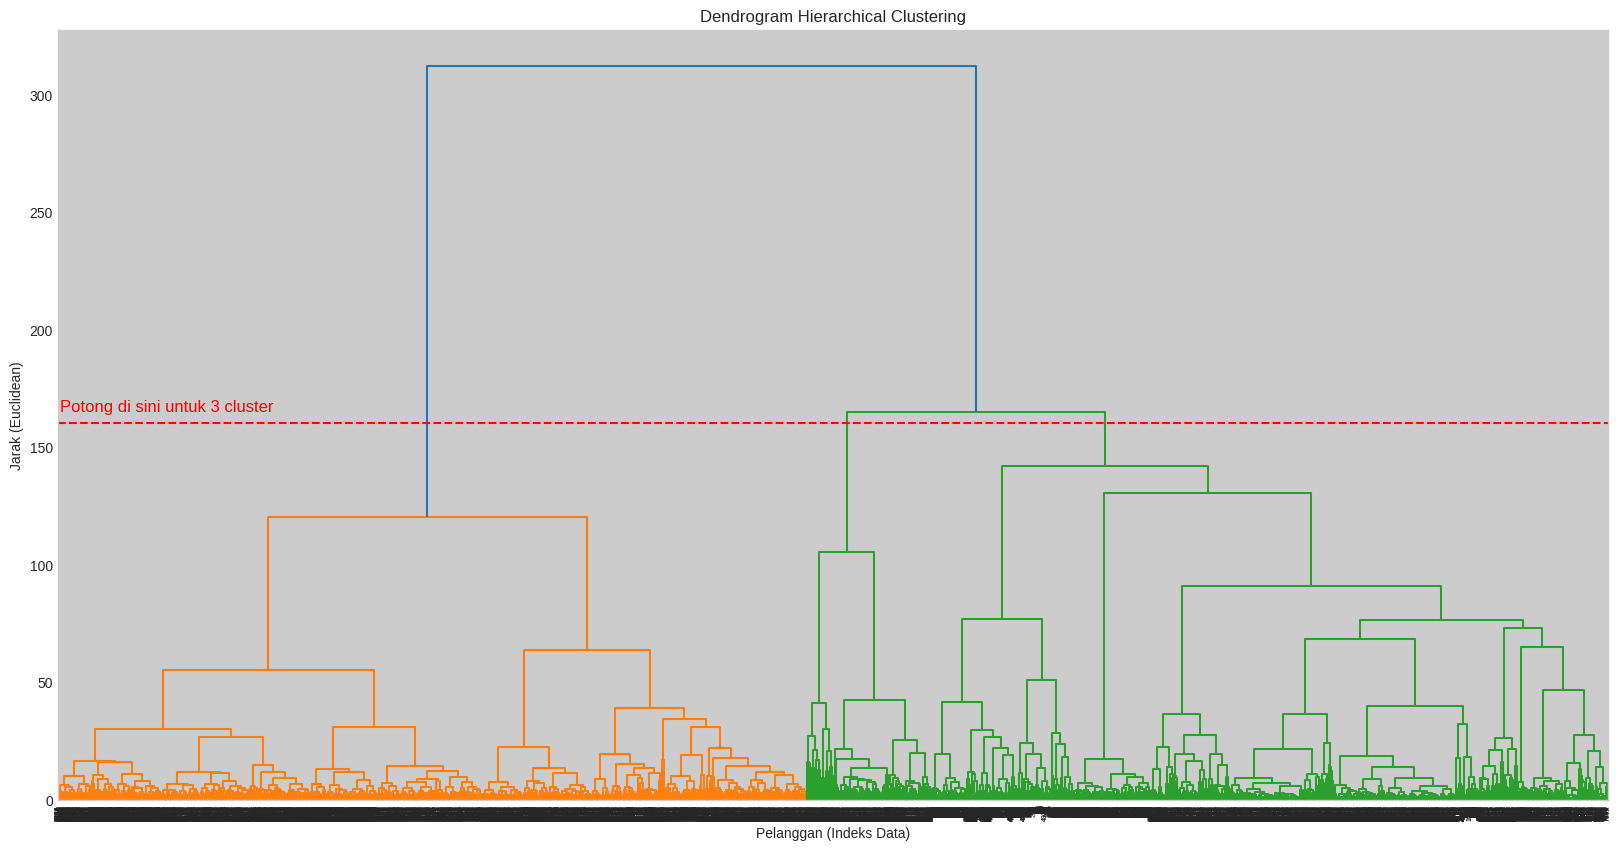

In [14]:
# Import library untuk hierarchical clustering
import scipy.cluster.hierarchy as sch

# Pastikan variabel X_scaled dari Langkah 1 sudah ada

# Membuat linkage matrix menggunakan metode 'ward'
# Metode 'ward' mencoba meminimalkan varians saat cluster-cluster digabungkan
plt.figure(figsize=(20, 10))
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Pelanggan (Indeks Data)')
plt.ylabel('Jarak (Euclidean)')

# Membuat dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Menambahkan garis untuk menunjukkan di mana kita akan 'memotong' untuk mendapatkan 3 cluster
plt.axhline(y=160, color='r', linestyle='--')
plt.text(100, 165, 'Potong di sini untuk 3 cluster', color='r', fontsize=12)

plt.show()

In [18]:
# Import model from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Ensure the original DataFrame 'df' still exists

# 1. Create and train the model
# We use n_clusters=4 for direct comparison with K-Means
# Based on the dendrogram visualization in the previous cell, K=3 seems more appropriate.
# Let's adjust the number of clusters to 3.
K_OPTIMAL_AGG = 3 # Setting optimal clusters based on dendrogram visualization
agg_model = AgglomerativeClustering(n_clusters=K_OPTIMAL_AGG, metric='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(X_scaled) # fit_predict directly trains and provides labels

# 2. Add cluster labels to the original DataFrame
df_agg_clustered = df.copy()
df_agg_clustered['Cluster'] = agg_labels

print(f"Agglomerative Clustering model with {K_OPTIMAL_AGG} clusters successfully created.")

# 3. Analyze clustering results
print("\n--- Number of Data Points per Cluster (Agglomerative) ---")
print(df_agg_clustered['Cluster'].value_counts().sort_index())

# 4. Display summary statistics for each cluster using actual column names
print("\n--- Average Characteristics per Cluster (Agglomerative) ---")
agg_cluster_summary = df_agg_clustered.groupby('Cluster').mean(numeric_only=True)

# Displaying the mean of all columns for each cluster since we don't have specific names like Income, etc.
print(agg_cluster_summary)

Agglomerative Clustering model with 3 clusters successfully created.

--- Number of Data Points per Cluster (Agglomerative) ---
Cluster
0    3134
1    3478
2     583
Name: count, dtype: int64

--- Average Characteristics per Cluster (Agglomerative) ---
               x1        x2        x3        x4        x5        x6        x7  \
Cluster                                                                         
0        0.998642  0.305383  0.337281  0.339676  0.092978  0.158497  0.116824   
1        0.998237  0.280400  0.212090  0.552590  0.187962  0.027928 -0.115414   
2        0.892981  0.679044  0.762556  0.381643 -0.053223  0.190063  0.043286   

               x8        x9       x10  ...       x14       x15       x16  \
Cluster                                ...                                 
0       -0.066663 -0.024248  0.120497  ...  0.075007  0.012890 -0.025355   
1        0.046221  0.261146  0.032197  ... -0.119155 -0.251864  0.096185   
2        0.078046  0.154756 -0.148740

# Evaluasi

In [19]:
# prompt: buat evaluasi dan perbandingan model  Calinski-Harabasz Index, Davies-Bouldin Index, Dunn Index,

# Pastikan Anda telah menjalankan kode dari langkah-langkah sebelumnya.
# Variabel X_scaled (data yang sudah di-scaling), cluster_labels (dari K-Means), dan agg_labels (dari Agglomerative) harus sudah ada.

# Import library metrik evaluasi jika belum diimport
# from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Metrik Dunn Index memerlukan library eksternal (misalnya, 'validity_indexes' atau implementasi manual)
# Karena 'validity_indexes' mungkin tidak terinstal secara default, kita akan fokus pada Calinski-Harabasz dan Davies-Bouldin
# yang tersedia di scikit-learn. Implementasi Dunn Index lebih kompleks dan memerlukan perhitungan jarak antar cluster dan jarak intra-cluster.

print("Memulai evaluasi model menggunakan Calinski-Harabasz dan Davies-Bouldin Index...")

# --- Evaluasi Model K-Means ---
print("\n--- Evaluasi K-Means Clustering ---")
try:
    # Calinski-Harabasz Index: Skor yang lebih tinggi menunjukkan cluster yang lebih baik (lebih padat dan terpisah).
    ch_score_kmeans = calinski_harabasz_score(X_scaled, cluster_labels)
    print(f"Calinski-Harabasz Index (K-Means): {ch_score_kmeans:.4f}")

    # Davies-Bouldin Index: Skor yang lebih rendah menunjukkan cluster yang lebih baik (lebih padat dan terpisah).
    db_score_kmeans = davies_bouldin_score(X_scaled, cluster_labels)
    print(f"Davies-Bouldin Index (K-Means): {db_score_kmeans:.4f}")

except Exception as e:
    print(f"Gagal menghitung metrik untuk K-Means: {e}")


# --- Evaluasi Model Agglomerative Clustering ---
print("\n--- Evaluasi Agglomerative Clustering ---")
try:
    # Calinski-Harabasz Index: Skor yang lebih tinggi menunjukkan cluster yang lebih baik.
    ch_score_agg = calinski_harabasz_score(X_scaled, agg_labels)
    print(f"Calinski-Harabasz Index (Agglomerative): {ch_score_agg:.4f}")

    # Davies-Bouldin Index: Skor yang lebih rendah menunjukkan cluster yang lebih baik.
    db_score_agg = davies_bouldin_score(X_scaled, agg_labels)
    print(f"Davies-Bouldin Index (Agglomerative): {db_score_agg:.4f}")

except Exception as e:
    print(f"Gagal menghitung metrik untuk Agglomerative Clustering: {e}")


# --- Perbandingan Hasil ---
print("\n--- Ringkasan Perbandingan Model ---")
print(f"Metrik Calinski-Harabasz:")
print(f"  K-Means: {ch_score_kmeans:.4f}")
print(f"  Agglomerative: {ch_score_agg:.4f}")
print("Penjelasan: Skor yang lebih tinggi lebih baik. Bandingkan kedua skor untuk melihat mana yang lebih tinggi.")

print(f"\nMetrik Davies-Bouldin:")
print(f"  K-Means: {db_score_kmeans:.4f}")
print(f"  Agglomerative: {db_score_agg:.4f}")
print("Penjelasan: Skor yang lebih rendah lebih baik. Bandingkan kedua skor untuk melihat mana yang lebih rendah.")

print("\n--- Interpretasi Sederhana ---")
if ch_score_kmeans > ch_score_agg:
    print("Berdasarkan Calinski-Harabasz Index, K-Means menunjukkan performa yang sedikit lebih baik.")
elif ch_score_agg > ch_score_kmeans:
     print("Berdasarkan Calinski-Harabasz Index, Agglomerative Clustering menunjukkan performa yang sedikit lebih baik.")
else:
    print("Berdasarkan Calinski-Harabasz Index, kedua model memiliki performa yang serupa.")

if db_score_kmeans < db_score_agg:
    print("Berdasarkan Davies-Bouldin Index, K-Means menunjukkan performa yang sedikit lebih baik.")
elif db_score_agg < db_score_kmeans:
    print("Berdasarkan Davies-Bouldin Index, Agglomerative Clustering menunjukkan performa yang sedikit lebih baik.")
else:
     print("Berdasarkan Davies-Bouldin Index, kedua model memiliki performa yang serupa.")

print("\nCatatan:")
print("- Dunn Index tidak disertakan karena memerlukan implementasi atau library tambahan.")
print("- Interpretasi ini bersifat kuantitatif berdasarkan metrik. Evaluasi kualitatif berdasarkan domain bisnis juga penting.")
print("- Hasil bisa bervariasi tergantung pada data, jumlah cluster yang dipilih, dan parameter model.")


Memulai evaluasi model menggunakan Calinski-Harabasz dan Davies-Bouldin Index...

--- Evaluasi K-Means Clustering ---
Calinski-Harabasz Index (K-Means): 2421.8168
Davies-Bouldin Index (K-Means): 1.4446

--- Evaluasi Agglomerative Clustering ---
Calinski-Harabasz Index (Agglomerative): 2329.6292
Davies-Bouldin Index (Agglomerative): 1.4568

--- Ringkasan Perbandingan Model ---
Metrik Calinski-Harabasz:
  K-Means: 2421.8168
  Agglomerative: 2329.6292
Penjelasan: Skor yang lebih tinggi lebih baik. Bandingkan kedua skor untuk melihat mana yang lebih tinggi.

Metrik Davies-Bouldin:
  K-Means: 1.4446
  Agglomerative: 1.4568
Penjelasan: Skor yang lebih rendah lebih baik. Bandingkan kedua skor untuk melihat mana yang lebih rendah.

--- Interpretasi Sederhana ---
Berdasarkan Calinski-Harabasz Index, K-Means menunjukkan performa yang sedikit lebih baik.
Berdasarkan Davies-Bouldin Index, K-Means menunjukkan performa yang sedikit lebih baik.

Catatan:
- Dunn Index tidak disertakan karena memerluka